<a href="https://colab.research.google.com/github/vidhya1214/Recognizing-Handwritten-digits-for-deap-learning-for-smarter-AI-Applications-/blob/main/Source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7994 - loss: 0.6842 - val_accuracy: 0.9508 - val_loss: 0.1779
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9540 - loss: 0.1634 - val_accuracy: 0.9603 - val_loss: 0.1318
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9697 - loss: 0.1041 - val_accuracy: 0.9665 - val_loss: 0.1110
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9768 - loss: 0.0779 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9819 - loss: 0.0647 - val_accuracy: 0.9693 - val_loss: 0.1020
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1047

Test Accuracy: 0.9703
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


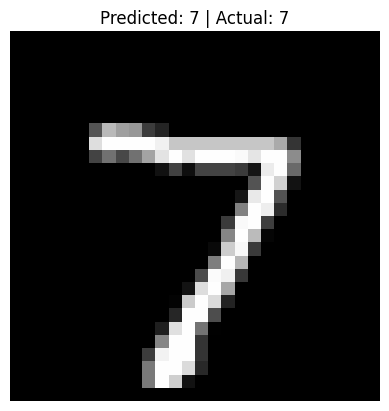

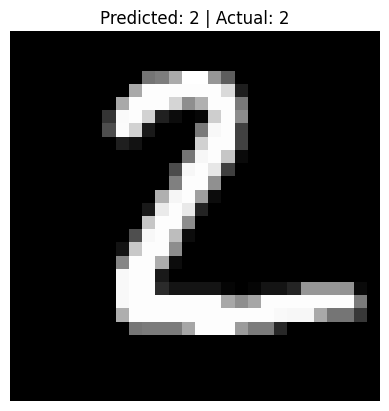

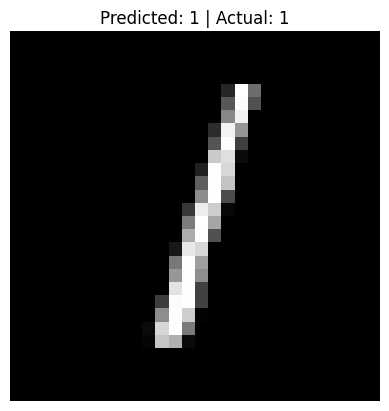

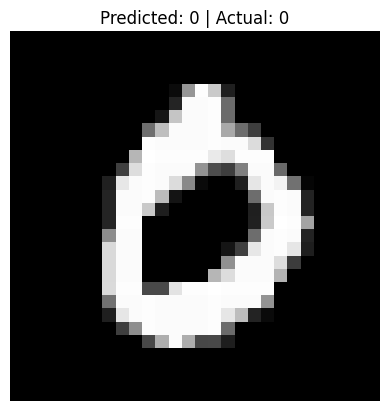

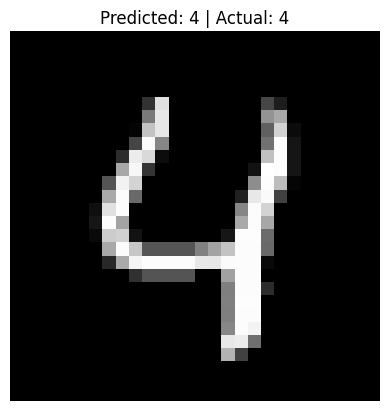

In [ ]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Build the deep learning model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))         # Input layer
model.add(Dense(128, activation='relu'))         # Hidden layer
model.add(Dense(64, activation='relu'))          # Another hidden layer
model.add(Dense(10, activation='softmax'))       # Output layer (10 digits)

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=5, batch_size=128,
                    validation_split=0.2, verbose=1)

# 7. Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {accuracy:.4f}")

# 8. Predict and show sample results
predictions = model.predict(x_test)

# Show a few predictions
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()